# Task
>From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.

In [55]:
# Import necessary library.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from kneed import KneeLocator

In [56]:
# Load the iris dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Finding optimum number of clusters.

In [57]:
# Try and test diffrent number of clusters to find optimum number of clustes.
data = df.iloc[:,0:].values
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init= "k-means++", random_state= 27)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

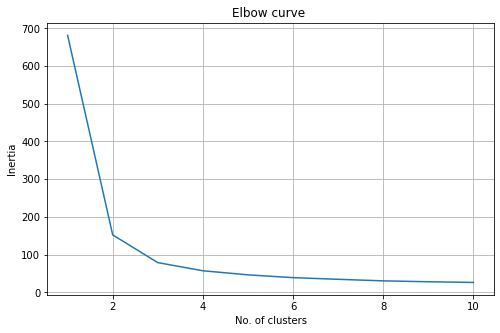

In [58]:
# Evalute inertia_ for diffrent number of clusters.
# plot Elbow curve.
plt.figure(figsize=(8,5))
plt.plot(range(1,11),wcss)
plt.title("Elbow curve ")
plt.xlabel('No. of clusters')
plt.ylabel('Inertia')
plt.grid()

In [59]:
# Finding optimum number of cluster.
optimum_number_of_cluster= KneeLocator(range(1,11),wcss, curve='convex', direction= 'decreasing').knee
print('Optimum number of clusters is: {}'.format(optimum_number_of_cluster))

Optimum number of clusters is: 3


In [60]:
# Predict the cluster number for each data points.
kmeans = KMeans(n_clusters= optimum_number_of_cluster, init= "k-means++", random_state= 27)
kmeans.fit(data)
y_kmeans = kmeans.fit_predict(data)

KMeans(n_clusters=3, random_state=27)

In [77]:
# Concate cluster numbers.
new_df = pd.concat([df,pd.DataFrame(y_kmeans)],axis=1)
new_df.rename(columns={0:"Cluster"},inplace=True)

In [78]:
new_df

,sepal_length,sepal_width,petal_length,petal_width,Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Visualize cluster

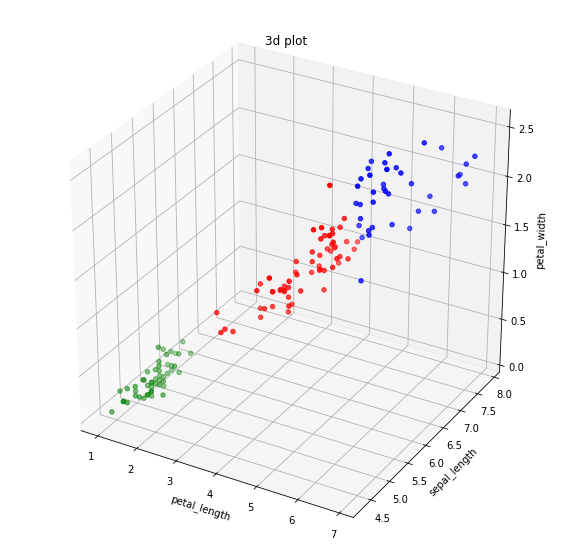

In [87]:
# Visualize your result.
from mpl_toolkits import mplot3d
color = {0:'red',1:'green',2:'blue'}
c2 = {0:'black',1:'black',2:'black'}
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(new_df["petal_length"],new_df["sepal_length"],new_df["petal_width"],c=new_df.Cluster.map(color))
ax.set_xlabel("petal_length")
ax.set_ylabel("sepal_length")
ax.set_zlabel("petal_width")
ax.set_title("3d plot")
plt.show()